# Predicting Concrete Compressive Strength 

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Reading Dataset

Source : https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
  
Input variables :
* Cement 

*   Blast Furnace Slag 
*   Fly Ash
*   Water
*   Superplasticizer
*   Coarse Aggregate 
*   Fine Aggregate 
*   Age 

Output variable : 
*   Concrete compressive strength 


---



In [ ]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls',header=None,skiprows=1)
df.head()

,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.shape


(1030, 9)

In [ ]:
#m is the number of training data
m = len(df)
print(m)

1030


## Detecting missing values in the array

In [ ]:
pd.isna(df).any()


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

No NaN/None values.

## Concatenating a biasing constant of value 1 to the features array

In [ ]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2,3,4,5,6,7,8
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,1,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Arranging the input matrix X


In [ ]:
#dropping the last column of dataset
X = df.drop(columns=8)
print(X)


      00      0      1      2      3     4       5      6    7
0      1  540.0    0.0    0.0  162.0   2.5  1040.0  676.0   28
1      1  540.0    0.0    0.0  162.0   2.5  1055.0  676.0   28
2      1  332.5  142.5    0.0  228.0   0.0   932.0  594.0  270
3      1  332.5  142.5    0.0  228.0   0.0   932.0  594.0  365
4      1  198.6  132.4    0.0  192.0   0.0   978.4  825.5  360
...   ..    ...    ...    ...    ...   ...     ...    ...  ...
1025   1  276.4  116.0   90.3  179.6   8.9   870.1  768.3   28
1026   1  322.2    0.0  115.6  196.0  10.4   817.9  813.4   28
1027   1  148.5  139.4  108.6  192.7   6.1   892.4  780.0   28
1028   1  159.1  186.7    0.0  175.6  11.3   989.6  788.9   28
1029   1  260.9  100.5   78.3  200.6   8.6   864.5  761.5   28

[1030 rows x 9 columns]


## Arranging the output vector Y

In [ ]:
#Selecting last column
Y = df.iloc[:, 9]
print(Y)


0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: 8, Length: 1030, dtype: float64


## Normalizing the data to optimize

In [ ]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
    
X.head()

,00,0,1,2,3,4,5,6,7
0,1,1.000000,0.000000,0.0,0.655870,0.07764,0.908297,0.681040,0.076712
1,1,1.000000,0.000000,0.0,0.655870,0.07764,0.921397,0.681040,0.076712
2,1,0.615741,0.396494,0.0,0.923077,0.00000,0.813974,0.598428,0.739726
3,1,0.615741,0.396494,0.0,0.923077,0.00000,0.813974,0.598428,1.000000
4,1,0.367778,0.368392,0.0,0.777328,0.00000,0.854498,0.831654,0.986301


## Defining our Cost function

In [ ]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.sum(np.square(error))
    return cost, error

## Defining the Gradient Descent Algorithm

In [ ]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

## Defining the Graph Plotting function

In [ ]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

## Initializing variables


### Theta vector

In [ ]:
theta =np.zeros(X.shape[1])

### Learning rate and number of iterations

In [ ]:
alpha = 0.01
iterations = 1000


## Computation Begins

### Calculating the initial cost error

In [ ]:
initial_cost, _ = cost_function(X, Y, theta)
print('With initialized theta vector of {0}, our cost error is {1}'.format(theta, initial_cost))

With initialized theta vector of [0. 0. 0. 0. 0. 0. 0. 0. 0.], our cost error is 780.8630643893939


### Running the Gradient Descent Algo

In [ ]:
theta, cost_num = gradient_descent(X, Y, theta, alpha, iterations)

### Plotting the cost error with number of iterations

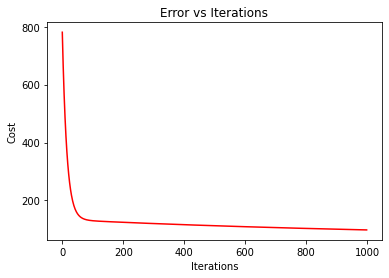

In [ ]:
plotChart(iterations, cost_num)


### Calculating the final cost error

In [ ]:
final_cost, _ = cost_function(X, Y, theta)
print('With final theta vector of {0}, our cost error is {1}'.format(theta, final_cost))

With final theta vector of [ 9.6423745  17.4792662   6.93614143 -0.45384736  3.39579364 11.15333087
  6.71409     5.61127318  9.24374212], our cost error is 98.22122751666909
